<a href="https://colab.research.google.com/github/sidharthan123/Implement-Gradient-Descent/blob/main/Copy_of_project_potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/scl/fi/gi1vivvd3rp62jbi8zg6z/potato-disease.zip?rlkey=j84yyhquq89u0u1v96ebqhiy0&st=e23czs52&dl=0

--2024-06-10 06:52:21--  https://www.dropbox.com/scl/fi/gi1vivvd3rp62jbi8zg6z/potato-disease.zip?rlkey=j84yyhquq89u0u1v96ebqhiy0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb281e2884bb22ed18bcdfe4c98.dl.dropboxusercontent.com/cd/0/inline/CUgdGkIR6ZNYfJdttB8OQIVYTKefhq3DcPFripzVHI7kqp0c5_HBimqGsQcW8SWTqb7zx9Rp3EXeyJmP1sUIxFDspcI3Rw4AvpMkr-zS5XUqLJE5PrmXpiRboCW63_hYocZS6CYeqotAJgv84sL0cs6Q/file# [following]
--2024-06-10 06:52:21--  https://ucb281e2884bb22ed18bcdfe4c98.dl.dropboxusercontent.com/cd/0/inline/CUgdGkIR6ZNYfJdttB8OQIVYTKefhq3DcPFripzVHI7kqp0c5_HBimqGsQcW8SWTqb7zx9Rp3EXeyJmP1sUIxFDspcI3Rw4AvpMkr-zS5XUqLJE5PrmXpiRboCW63_hYocZS6CYeqotAJgv84sL0cs6Q/file
Resolving ucb281e2884bb22ed18bcdfe4c98.dl.dropboxusercontent.com (ucb281e2884bb22ed18bcdfe4c98.dl.dropboxusercontent.com)... 162.125.4.15, 

In [ ]:
!unzip /content/potato-disease.zip?rlkey=j84yyhquq89u0u1v96ebqhiy0

Archive:  /content/potato-disease.zip?rlkey=j84yyhquq89u0u1v96ebqhiy0
   creating: potato disease/
   creating: potato disease/PlantVillage/
  inflating: __MACOSX/potato disease/._PlantVillage  
  inflating: potato disease/.DS_Store  
  inflating: __MACOSX/potato disease/._.DS_Store  
   creating: potato disease/PlantVillage/Potato___Early_blight/
  inflating: __MACOSX/potato disease/PlantVillage/._Potato___Early_blight  
  inflating: potato disease/PlantVillage/.DS_Store  
  inflating: __MACOSX/potato disease/PlantVillage/._.DS_Store  
   creating: potato disease/PlantVillage/Potato___Late_blight/
  inflating: __MACOSX/potato disease/PlantVillage/._Potato___Late_blight  
   creating: potato disease/PlantVillage/Potato___healthy/
  inflating: __MACOSX/potato disease/PlantVillage/._Potato___healthy  
  inflating: potato disease/PlantVillage/Potato___Early_blight/acb84d77-5b1c-4beb-be27-99fee467bf1f___RS_Early.B 7577.JPG  
  inflating: __MACOSX/potato disease/PlantVillage/Potato___Early_

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/potato disease/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [ ]:
train_size=.8
len(dataset)*train_size
train_ds=dataset.take(54)
len(dataset)*.1
dataset.skip(54)
val_ds=dataset.take(6)
dataset.skip(6)
test_ds=dataset.take(6)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7a0518ee80d0>>

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 211s 4s/step - loss: 0.8064 - accuracy: 0.5654 - val_loss: 0.8249 - val_accuracy: 0.6510
Epoch 2/10
54/54 [==============================] - 203s 4s/step - loss: 0.5974 - accuracy: 0.7263 - val_loss: 0.4337 - val_accuracy: 0.7708
Epoch 3/10
54/54 [==============================] - 217s 4s/step - loss: 0.3814 - accuracy: 0.8223 - val_loss: 0.3294 - val_accuracy: 0.8750
Epoch 4/10
54/54 [==============================] - 226s 4s/step - loss: 0.3740 - accuracy: 0.8692 - val_loss: 0.8421 - val_accuracy: 0.5260
Epoch 5/10
54/54 [==============================] - 221s 4s/step - loss: 0.4815 - accuracy: 0.7980 - val_loss: 0.2867 - val_accuracy: 0.8698
Epoch 6/10
54/54 [==============================] - 204s 4s/step - loss: 0.2280 - accuracy: 0.9097 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 7/10
54/54 [==============================] - 207s 4s/step - loss: 0.1455 - accuracy: 0.9439 - val_loss: 0.1383 - val_accuracy: 0.9323
Epoch 8/10
54

In [ ]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 8s 1s/step - loss: 0.1107 - accuracy: 0.9479


In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

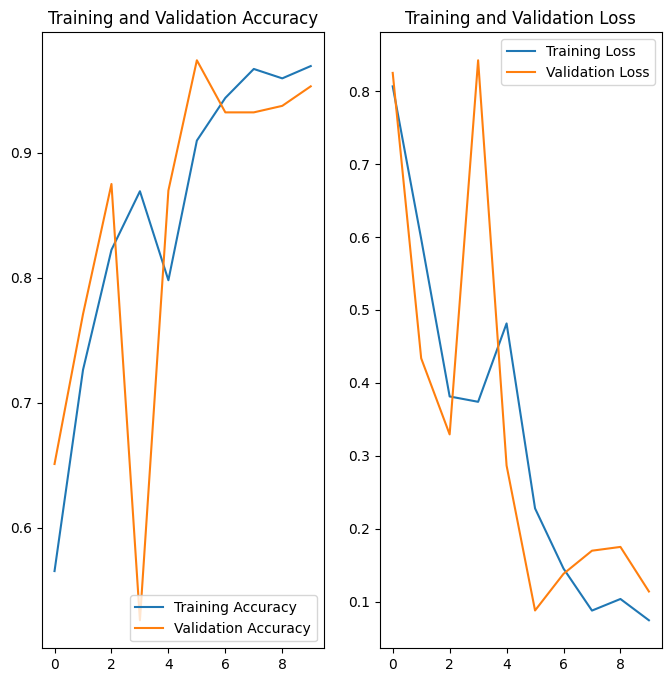

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


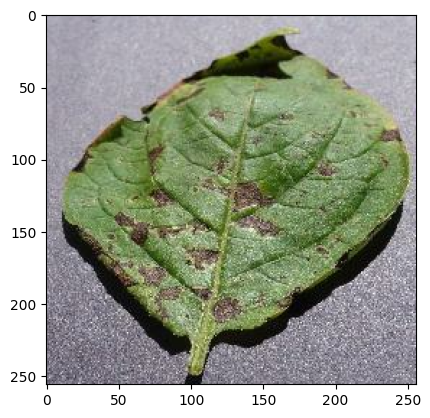

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[6])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 82ms/step


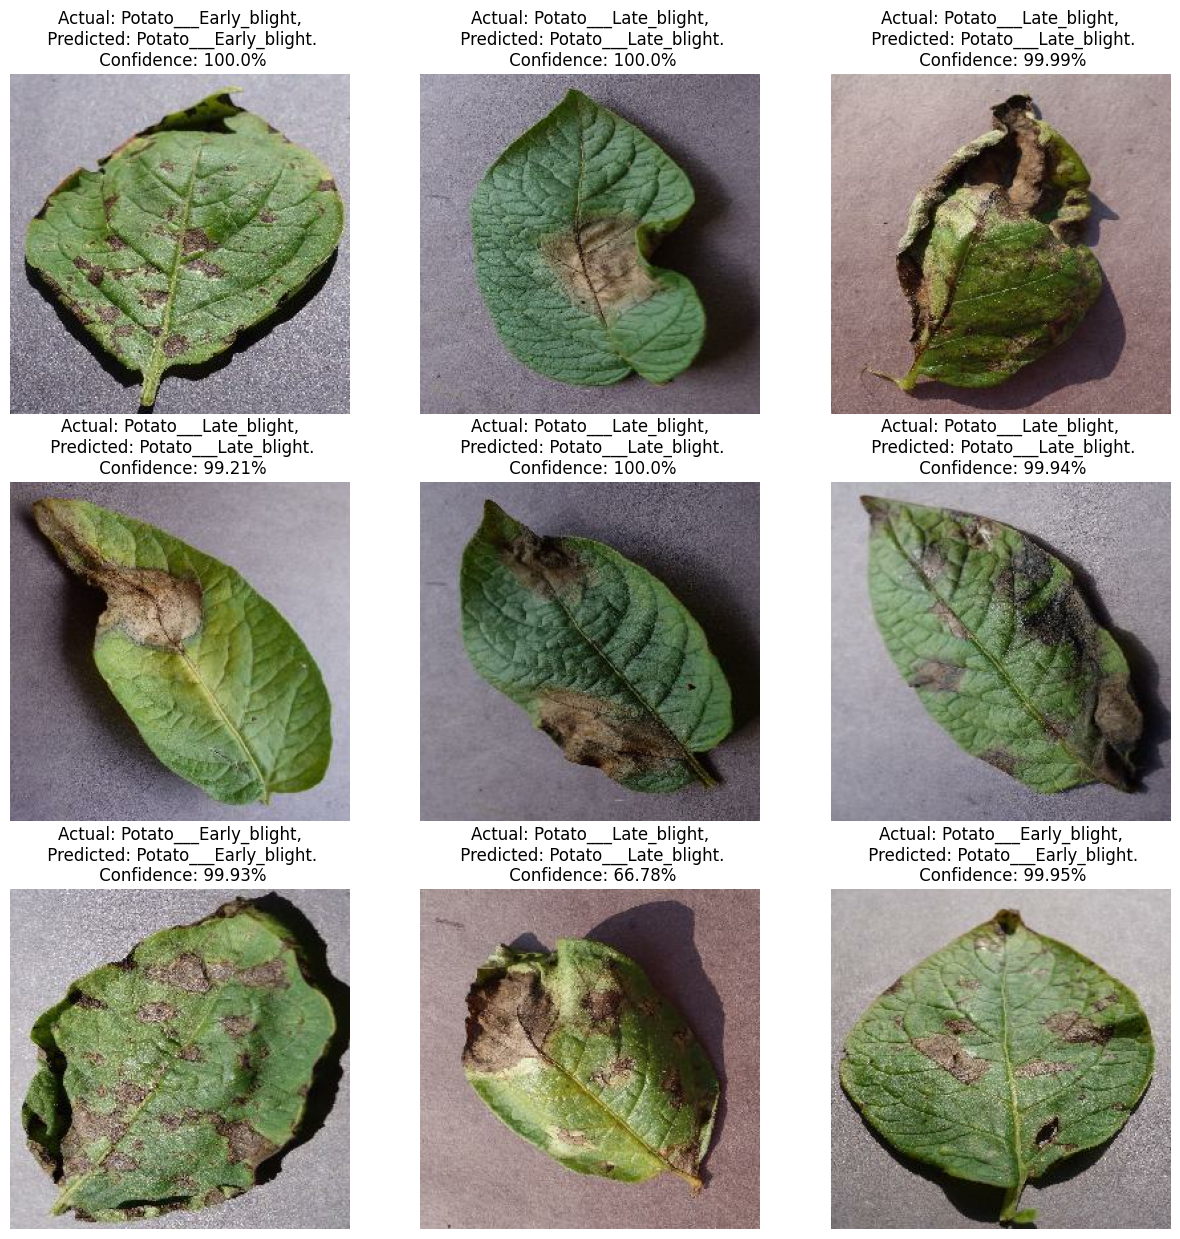

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")